<a href="https://colab.research.google.com/github/AnhQuocVo/Forcast_Analysis_Securities/blob/main/Financial_Analysis_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Financial Analysis Report: Vietnamese Banking & Securities Sectors**
----

### **1. Introduction**
The purpose of this analysis is to evaluate the financial health and investment potential of five companies in Vietnam's financial markets to inform our portfolio allocation strategy.

- **Sectors Analyzed:** Banking and Securities.
- **Companies (Tickers):**
    - **Banks:** Military Commercial Joint Stock Bank (**MBB**), Vietnam Technological and Commercial Joint Stock Bank (**TCB**).
    - **Securities:** Viet Capital Securities (**VCI**), SSI Securities Corporation (**SSI**), VNDIRECT Securities Corporation (**VND**).
- **Data Sources:** The analysis is based on quarterly financial statements and derived ratio data, visualized in time-series dashboards covering a period from approximately 2019 to 2024.



### **2. Methodology**

The methodology is focused on horizontal analysis, focusing on:
- **Time-Series Analysis:** Evaluating key performance indicators (KPIs) over a multi-year period to identify trends, cyclicality, and consistency.
- **Comparative Benchmarking:** Assessing each company’s performance against its own 5-year historical average and against its direct peers within the analysis group. This contextualizes performance and valuation.
- **Ratio Analysis:** Utilizing a suite of financial ratios, including profitability (ROE, ROA), valuation (P/E, P/B), and leverage (Debt/Equity) to diagnose financial health and identify market anomalies.

This methodology supports portfolio decisions by systematically identifying fundamentally strong companies trading at a discount (potential buys) and fundamentally weak or high-risk companies trading at a premium (potential sells/underweights).


### 2.1 Load Data & Libary

In [9]:
#!pip install vnstock pandas numpy

In [10]:
from vnstock import Vnstock

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
tickers = ['VCI', 'SSI', 'VND', 'TCB', 'MBB']

all_bs = {}
all_is = {}
all_cf = {}
all_ratios = {}
all_prices = {}

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        stock = Vnstock().stock(symbol=ticker, source='TCBS')

        # Fetch financial statements and ratios
        bs = stock.finance.balance_sheet(period='quarter', lang='vi')
        is_ = stock.finance.income_statement(period='quarter', lang='vi')
        cf = stock.finance.cash_flow(period='quarter')
        ratios = stock.finance.ratio(period='quarter', lang='vi')

        # TCBS source does not have a 'price' attribute like VCI
        # prices = stock.price.historical(start='2015-01-01', end='2025-01-01', interval='1D')

        all_bs[ticker] = bs
        all_is[ticker] = is_
        all_cf[ticker] = cf
        all_ratios[ticker] = ratios
        # all_prices[ticker] = prices

    except Exception as e:
        print(f"Could not fetch data for {ticker}: {e}")


2025-10-13 15:12:06 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-13 15:12:06 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports


Fetching data for VCI...


2025-10-13 15:12:06 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:06 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:07 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-13 15:12:07 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports


Fetching data for SSI...


2025-10-13 15:12:07 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:07 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:08 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-13 15:12:08 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports


Fetching data for VND...


2025-10-13 15:12:08 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:08 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:09 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-13 15:12:09 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports


Fetching data for TCB...


2025-10-13 15:12:09 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:09 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:10 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
2025-10-13 15:12:10 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports


Fetching data for MBB...


2025-10-13 15:12:10 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports
2025-10-13 15:12:10 - vnstock.common.data.data_explorer - INFO - TCBS only supports Vietnamese reports


### 2.2 Processing Data & EDA

In [12]:
combined_bs = pd.DataFrame()
for ticker, df in all_bs.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})    # Assuming the 'period' column is the date/period index
    combined_bs = pd.concat([combined_bs, df])
combined_bs = combined_bs.set_index(['ticker', 'date']) # Set 'ticker' and 'date' as the index


# Combine Income Statement DataFrames
combined_is = pd.DataFrame()
for ticker, df in all_is.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})
    combined_is = pd.concat([combined_is, df])
combined_is = combined_is.set_index(['ticker', 'date'])

# Combine Cash Flow DataFrames
combined_cf = pd.DataFrame()
for ticker, df in all_cf.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})
    combined_cf = pd.concat([combined_cf, df])
combined_cf = combined_cf.set_index(['ticker', 'date'])

# Combine Ratios DataFrames
combined_ratios = pd.DataFrame()
for ticker, df in all_ratios.items():
    df['ticker'] = ticker
    df = df.reset_index().rename(columns={'period': 'date'})
    combined_ratios = pd.concat([combined_ratios, df])
combined_ratios = combined_ratios.set_index(['ticker', 'date'])

#Generate new Index
def convert_quarter_to_date(quarter_str):
    """Converts a quarter string (YYYY-QX) to a quarter-end date."""
    year, quarter = quarter_str.split('-Q')
    year = int(year)
    quarter = int(quarter)
    if quarter == 1:
        return pd.to_datetime(f'{year}-03-31')
    elif quarter == 2:
        return pd.to_datetime(f'{year}-06-30')
    elif quarter == 3:
        return pd.to_datetime(f'{year}-09-30')
    elif quarter == 4:
        return pd.to_datetime(f'{year}-12-31')
    else:
        return None

# Apply the conversion to the 'date' level of the MultiIndex for each DataFrame
for df in [combined_bs, combined_is, combined_cf, combined_ratios]:
    df.index = pd.MultiIndex.from_arrays([
        df.index.get_level_values('ticker'),
        df.index.get_level_values('date').map(convert_quarter_to_date)
    ], names=['ticker', 'date'])

# fill 0 with null
for df_name in ['combined_bs', 'combined_is', 'combined_cf', 'combined_ratios']:
    globals()[df_name] = globals()[df_name].replace(0, np.nan)

# filter >= 2019
for name in ['combined_bs', 'combined_is', 'combined_cf', 'combined_ratios']:
    df = globals()[name]
    # Filter based on the date level of the MultiIndex
    globals()[name] = df[df.index.get_level_values('date') >= '2019-01-01']


print("Unique columns in combined_bs:")
display(combined_bs.head())
print("Unique columns in combined_is:")
display(combined_is.head())
print("\nUnique columns in combined_cf:")
display(combined_cf.head())
print("\nUnique columns in combined_ratios:")
display(combined_ratios.head())

# column header & shape
print(combined_bs.columns.unique())
print(combined_bs.shape)
print(combined_is.columns.unique())
print(combined_is.shape)
print(combined_cf.columns.unique())
print(combined_cf.shape)
print(combined_ratios.columns.unique())
print(combined_ratios.shape)





Unique columns in combined_bs:


quarter  year  short_asset  cash  short_invest  \
ticker date                                                        
VCI    2025-06-30       2  2025      21777.0   472       20797.0   
       2025-03-31       1  2025      23621.0  2302       19710.0   
       2024-12-31       4  2024      26492.0  4744       21073.0   
       2024-09-30       3  2024      20322.0  2544       17409.0   
       2024-06-30       2  2024      23010.0  3903       17775.0   

                   short_receivable  inventory  long_asset  fixed_asset  \
ticker date                                                               
VCI    2025-06-30             340.0        NaN       120.0           56   
       2025-03-31            1257.0        NaN       107.0           43   
       2024-12-31             507.0        NaN       100.0           37   
       2024-09-30             236.0        NaN        93.0           29   
       2024-06-30             931.0        NaN        95.0           32   

                   asset  ...  net_customer_loan  other_asset  \
ticker date               ...                                   
VCI    2025-06-30  21898  ...                NaN          NaN   
       2025-03-31  23728  ...                NaN          NaN   
       2024-12-31  26592  ...                NaN          NaN   
       2024-09-30  20415  ...                NaN          NaN   
       2024-06-30  23105  ...                NaN          NaN   

                   other_bank_credit  owe_other_bank  owe_central_bank  \
ticker date                                                              
VCI    2025-06-30                NaN             NaN               NaN   
       2025-03-31                NaN             NaN               NaN   
       2024-12-31                NaN             NaN               NaN   
       2024-09-30                NaN             NaN               NaN   
       2024-06-30                NaN             NaN               NaN   

                   valuable_paper  payable_interest  receivable_interest  \
ticker date                                                                
VCI    2025-06-30             NaN               NaN                  NaN   
       2025-03-31             NaN               NaN                  NaN   
       2024-12-31             NaN               NaN                  NaN   
       2024-09-30             NaN               NaN                  NaN   
       2024-06-30             NaN               NaN                  NaN   

                   deposit  fund  
ticker date                       
VCI    2025-06-30      NaN   NaN  
       2025-03-31      NaN   NaN  
       2024-12-31      NaN   NaN  
       2024-09-30      NaN   NaN  
       2024-06-30      NaN   NaN  

[5 rows x 36 columns]

Unique columns in combined_is:


quarter  year  revenue  year_revenue_growth  \
ticker date                                                     
VCI    2025-06-30       2  2025     1160                0.266   
       2025-03-31       1  2025      851                0.055   
       2024-12-31       4  2024      999                0.240   
       2024-09-30       3  2024      974                0.461   
       2024-06-30       2  2024      916                0.829   

                   quarter_revenue_growth  cost_of_good_sold  gross_profit  \
ticker date                                                                  
VCI    2025-06-30                   0.363             -772.0         387.0   
       2025-03-31                  -0.148             -314.0         537.0   
       2024-12-31                   0.025             -520.0         479.0   
       2024-09-30                   0.064             -468.0         506.0   
       2024-06-30                   0.136             -359.0         557.0   

                   operation_expense  operation_profit  \
ticker date                                              
VCI    2025-06-30              -27.0             361.0   
       2025-03-31              -23.0             514.0   
       2024-12-31              -32.0             447.0   
       2024-09-30              -48.0             458.0   
       2024-06-30              -34.0             522.0   

                   year_operation_profit_growth  ...  post_tax_profit  \
ticker date                                      ...                    
VCI    2025-06-30                        -0.310  ...              184   
       2025-03-31                         0.267  ...              295   
       2024-12-31                         0.320  ...              218   
       2024-09-30                         0.235  ...              215   
       2024-06-30                         0.540  ...              279   

                   share_holder_income  year_share_holder_income_growth  \
ticker date                                                               
VCI    2025-06-30                  184                           -0.341   
       2025-03-31                  295                            0.491   
       2024-12-31                  218                            0.776   
       2024-09-30                  215                            0.203   
       2024-06-30                  279                            1.388   

                   quarter_share_holder_income_growth  ebitda  invest_profit  \
ticker date                                                                    
VCI    2025-06-30                              -0.376   364.0            NaN   
       2025-03-31                               0.350   518.0            NaN   
       2024-12-31                               0.014   450.0            NaN   
       2024-09-30                              -0.229   461.0            NaN   
       2024-06-30                               0.412   525.0            NaN   

                   service_profit  other_profit  provision_expense  \
ticker date                                                          
VCI    2025-06-30             NaN           NaN                NaN   
       2025-03-31             NaN           NaN                NaN   
       2024-12-31             NaN           NaN                NaN   
       2024-09-30             NaN           NaN                NaN   
       2024-06-30             NaN           NaN                NaN   

                   operation_income  
ticker date                          
VCI    2025-06-30               NaN  
       2025-03-31               NaN  
       2024-12-31               NaN  
       2024-09-30               NaN  
       2024-06-30               NaN  

[5 rows x 23 columns]


Unique columns in combined_cf:


quarter  year  invest_cost  from_invest  from_financial  \
ticker date                                                                 
VCI    2025-06-30       2  2025        -18.0        -18.0         -1693.0   
       2025-03-31       1  2025         -9.0         -9.0         -2442.0   
       2024-12-31       4  2024        -12.0        -12.0          5763.0   
       2024-09-30       3  2024         -2.0         -2.0         -1856.0   
       2024-06-30       2  2024        -13.0        -13.0          2204.0   

                   from_sale  free_cash_flow  
ticker date                                   
VCI    2025-06-30       -120           866.0  
       2025-03-31         10          1012.0  
       2024-12-31      -3551           809.0  
       2024-09-30        498           800.0  
       2024-06-30        671           792.0


Unique columns in combined_ratios:


quarter  year  price_to_earning  price_to_book  \
ticker date                                                         
VCI    2025-06-30        2  2025              34.5            2.5   
       2025-03-31        1  2025              27.5            2.2   
       2024-12-31        4  2024              26.2            1.8   
       2024-09-30        3  2024              32.3            3.0   
       2024-06-30        2  2024              32.4            2.8   

                   value_before_ebitda    roe    roa  days_receivable  \
ticker date                                                             
VCI    2025-06-30                 22.1  0.086  0.041           1013.0   
       2025-03-31                 19.5  0.097  0.047           1054.0   
       2024-12-31                 18.9  0.090  0.042           1045.0   
       2024-09-30                 18.1  0.102  0.044            874.0   
       2024-06-30                 17.7  0.096  0.041            982.0   

                   days_payable  earning_per_share  ...  pre_provision_on_toi  \
ticker date                                         ...                         
VCI    2025-06-30          81.0             1262.0  ...                   NaN   
       2025-03-31          24.0             1394.0  ...                   NaN   
       2024-12-31          21.0             1260.0  ...                   NaN   
       2024-09-30           9.0             1128.0  ...                   NaN   
       2024-06-30         120.0             1077.0  ...                   NaN   

                   post_tax_on_toi  loan_on_earn_asset  loan_on_asset  \
ticker date                                                             
VCI    2025-06-30              NaN                 NaN            NaN   
       2025-03-31              NaN                 NaN            NaN   
       2024-12-31              NaN                 NaN            NaN   
       2024-09-30              NaN                 NaN            NaN   
       2024-06-30              NaN                 NaN            NaN   

                   loan_on_deposit  deposit_on_earn_asset  bad_debt_on_asset  \
ticker date                                                                    
VCI    2025-06-30              NaN                    NaN                NaN   
       2025-03-31              NaN                    NaN                NaN   
       2024-12-31              NaN                    NaN                NaN   
       2024-09-30              NaN                    NaN                NaN   
       2024-06-30              NaN                    NaN                NaN   

                   liquidity_on_liability  cancel_debt  credit_growth  
ticker date                                                            
VCI    2025-06-30                     NaN          NaN            NaN  
       2025-03-31                     NaN          NaN            NaN  
       2024-12-31                     NaN          NaN            NaN  
       2024-09-30                     NaN          NaN            NaN  
       2024-06-30                     NaN          NaN            NaN  

[5 rows x 55 columns]

Index(['quarter', 'year', 'short_asset', 'cash', 'short_invest',
       'short_receivable', 'inventory', 'long_asset', 'fixed_asset', 'asset',
       'debt', 'short_debt', 'long_debt', 'equity', 'capital', 'other_debt',
       'un_distributed_income', 'minor_share_holder_profit', 'payable',
       'central_bank_deposit', 'other_bank_deposit', 'other_bank_loan',
       'stock_invest', 'customer_loan', 'bad_loan', 'provision',
       'net_customer_loan', 'other_asset', 'other_bank_credit',
       'owe_other_bank', 'owe_central_bank', 'valuable_paper',
       'payable_interest', 'receivable_interest', 'deposit', 'fund'],
      dtype='object')
(130, 36)
Index(['quarter', 'year', 'revenue', 'year_revenue_growth',
       'quarter_revenue_growth', 'cost_of_good_sold', 'gross_profit',
       'operation_expense', 'operation_profit', 'year_operation_profit_growth',
       'quarter_operation_profit_growth', 'interest_expense', 'pre_tax_profit',
       'post_tax_profit', 'share_holder_income',
   

In [13]:
print(combined_is.isnull().sum())
print(combined_bs.isnull().sum())
print(combined_ratios.isnull().sum())
print(combined_cf.isnull().sum())

quarter                                0
year                                   0
revenue                                0
year_revenue_growth                    0
quarter_revenue_growth                 0
cost_of_good_sold                     52
gross_profit                          52
operation_expense                      0
operation_profit                       0
year_operation_profit_growth           1
quarter_operation_profit_growth        0
interest_expense                      52
pre_tax_profit                         0
post_tax_profit                        0
share_holder_income                    0
year_share_holder_income_growth        2
quarter_share_holder_income_growth     2
ebitda                                52
invest_profit                         78
service_profit                        78
other_profit                          78
provision_expense                     78
operation_income                      78
dtype: int64
quarter                        0
year       

### **3. Company / Security Analysis**

#### 3.1. Profitability Analysis

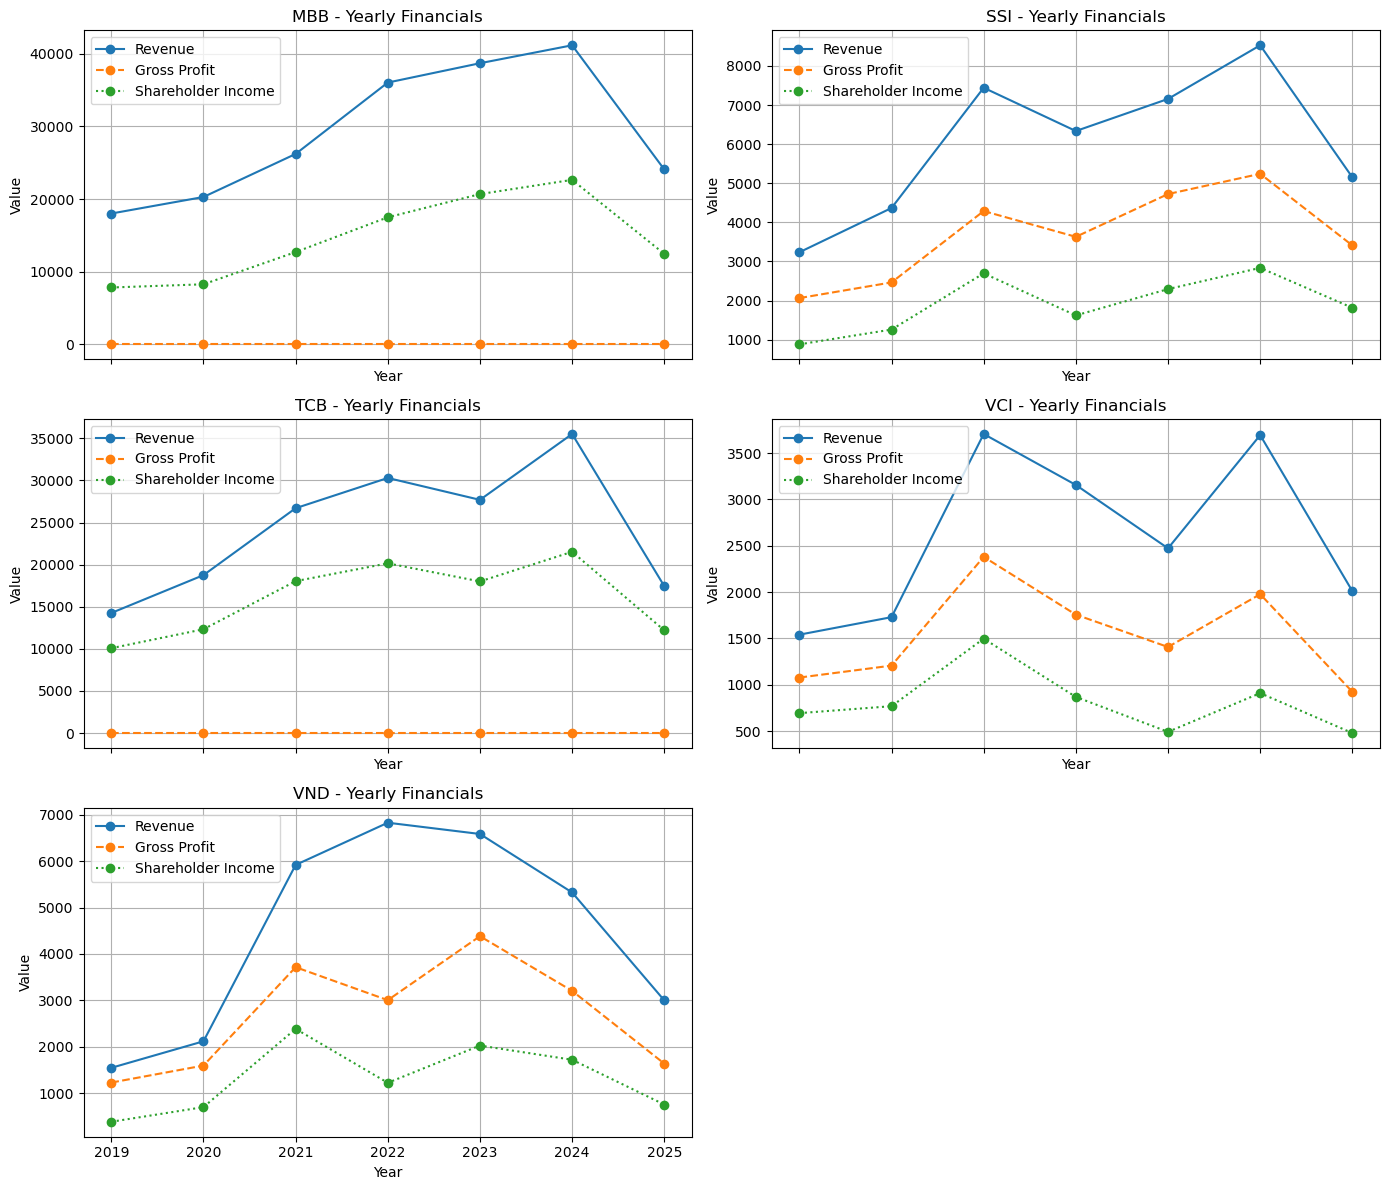


Average Annual Revenue Growth across all tickers: 0.24
Average Annual Shareholder Income Growth across all tickers: 0.83


In [14]:
# # Aggregate income statement data by ticker and year
income_statement_yearly = combined_is.groupby(['ticker', combined_is.index.get_level_values('date').year])[['revenue', 'gross_profit', 'share_holder_income']].sum()
income_statement_yearly.index.names = ['ticker', 'year']

# # Reset index for plotting
income_statement_yearly_reset = income_statement_yearly.reset_index()

# Get unique tickers
unique_tickers = income_statement_yearly_reset['ticker'].unique()
num_tickers = len(unique_tickers)

# Create subplots with 2 columns and adjusted figure size
# Calculate the number of rows needed based on the number of tickers and 2 columns
nrows = (num_tickers + 1) // 2
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 4 * nrows), sharex=True)

# Handle the case of a single row of subplots to ensure axes is a 2D array
if nrows == 1:
    axes = [axes]

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting
for i, ticker in enumerate(unique_tickers):
    ticker_data = income_statement_yearly_reset[income_statement_yearly_reset['ticker'] == ticker]
    axes[i].plot(ticker_data['year'], ticker_data['revenue'], marker='o', linestyle='-', label='Revenue')
    axes[i].plot(ticker_data['year'], ticker_data['gross_profit'], marker='o', linestyle='--', label='Gross Profit')
    axes[i].plot(ticker_data['year'], ticker_data['share_holder_income'], marker='o', linestyle=':', label='Shareholder Income')
    axes[i].set_title(f'{ticker} - Yearly Financials')
    axes[i].set_ylabel('Value')
    axes[i].set_xlabel('Year')
    axes[i].legend()
    axes[i].grid(True)

# Hide any unused subplots if the number of tickers is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.xlabel('Year') # This might need adjustment if sharex is True and xlabel is set only once
plt.tight_layout()
plt.show()

# Calculate average year_revenue_growth and year_share_holder_income_growth
average_year_revenue_growth = combined_is['year_revenue_growth'].mean()
average_year_share_holder_income_growth = combined_is['year_share_holder_income_growth'].mean()

print(f"\nAverage Annual Revenue Growth across all tickers: {average_year_revenue_growth:.2f}")
print(f"Average Annual Shareholder Income Growth across all tickers: {average_year_share_holder_income_growth:.2f}")


**Overview Finding:** The banks (**MBB, TCB**) demonstrate stable and predictable profitability, with **MBB** currently outperforming its historical average. In stark contrast, the securities firms (**VCI, SSI, VND**) are highly cyclical, with their current profitability metrics well below their 5-year averages, signaling a clear performance downturn.


#### 3.2. Financial Stability Analysis


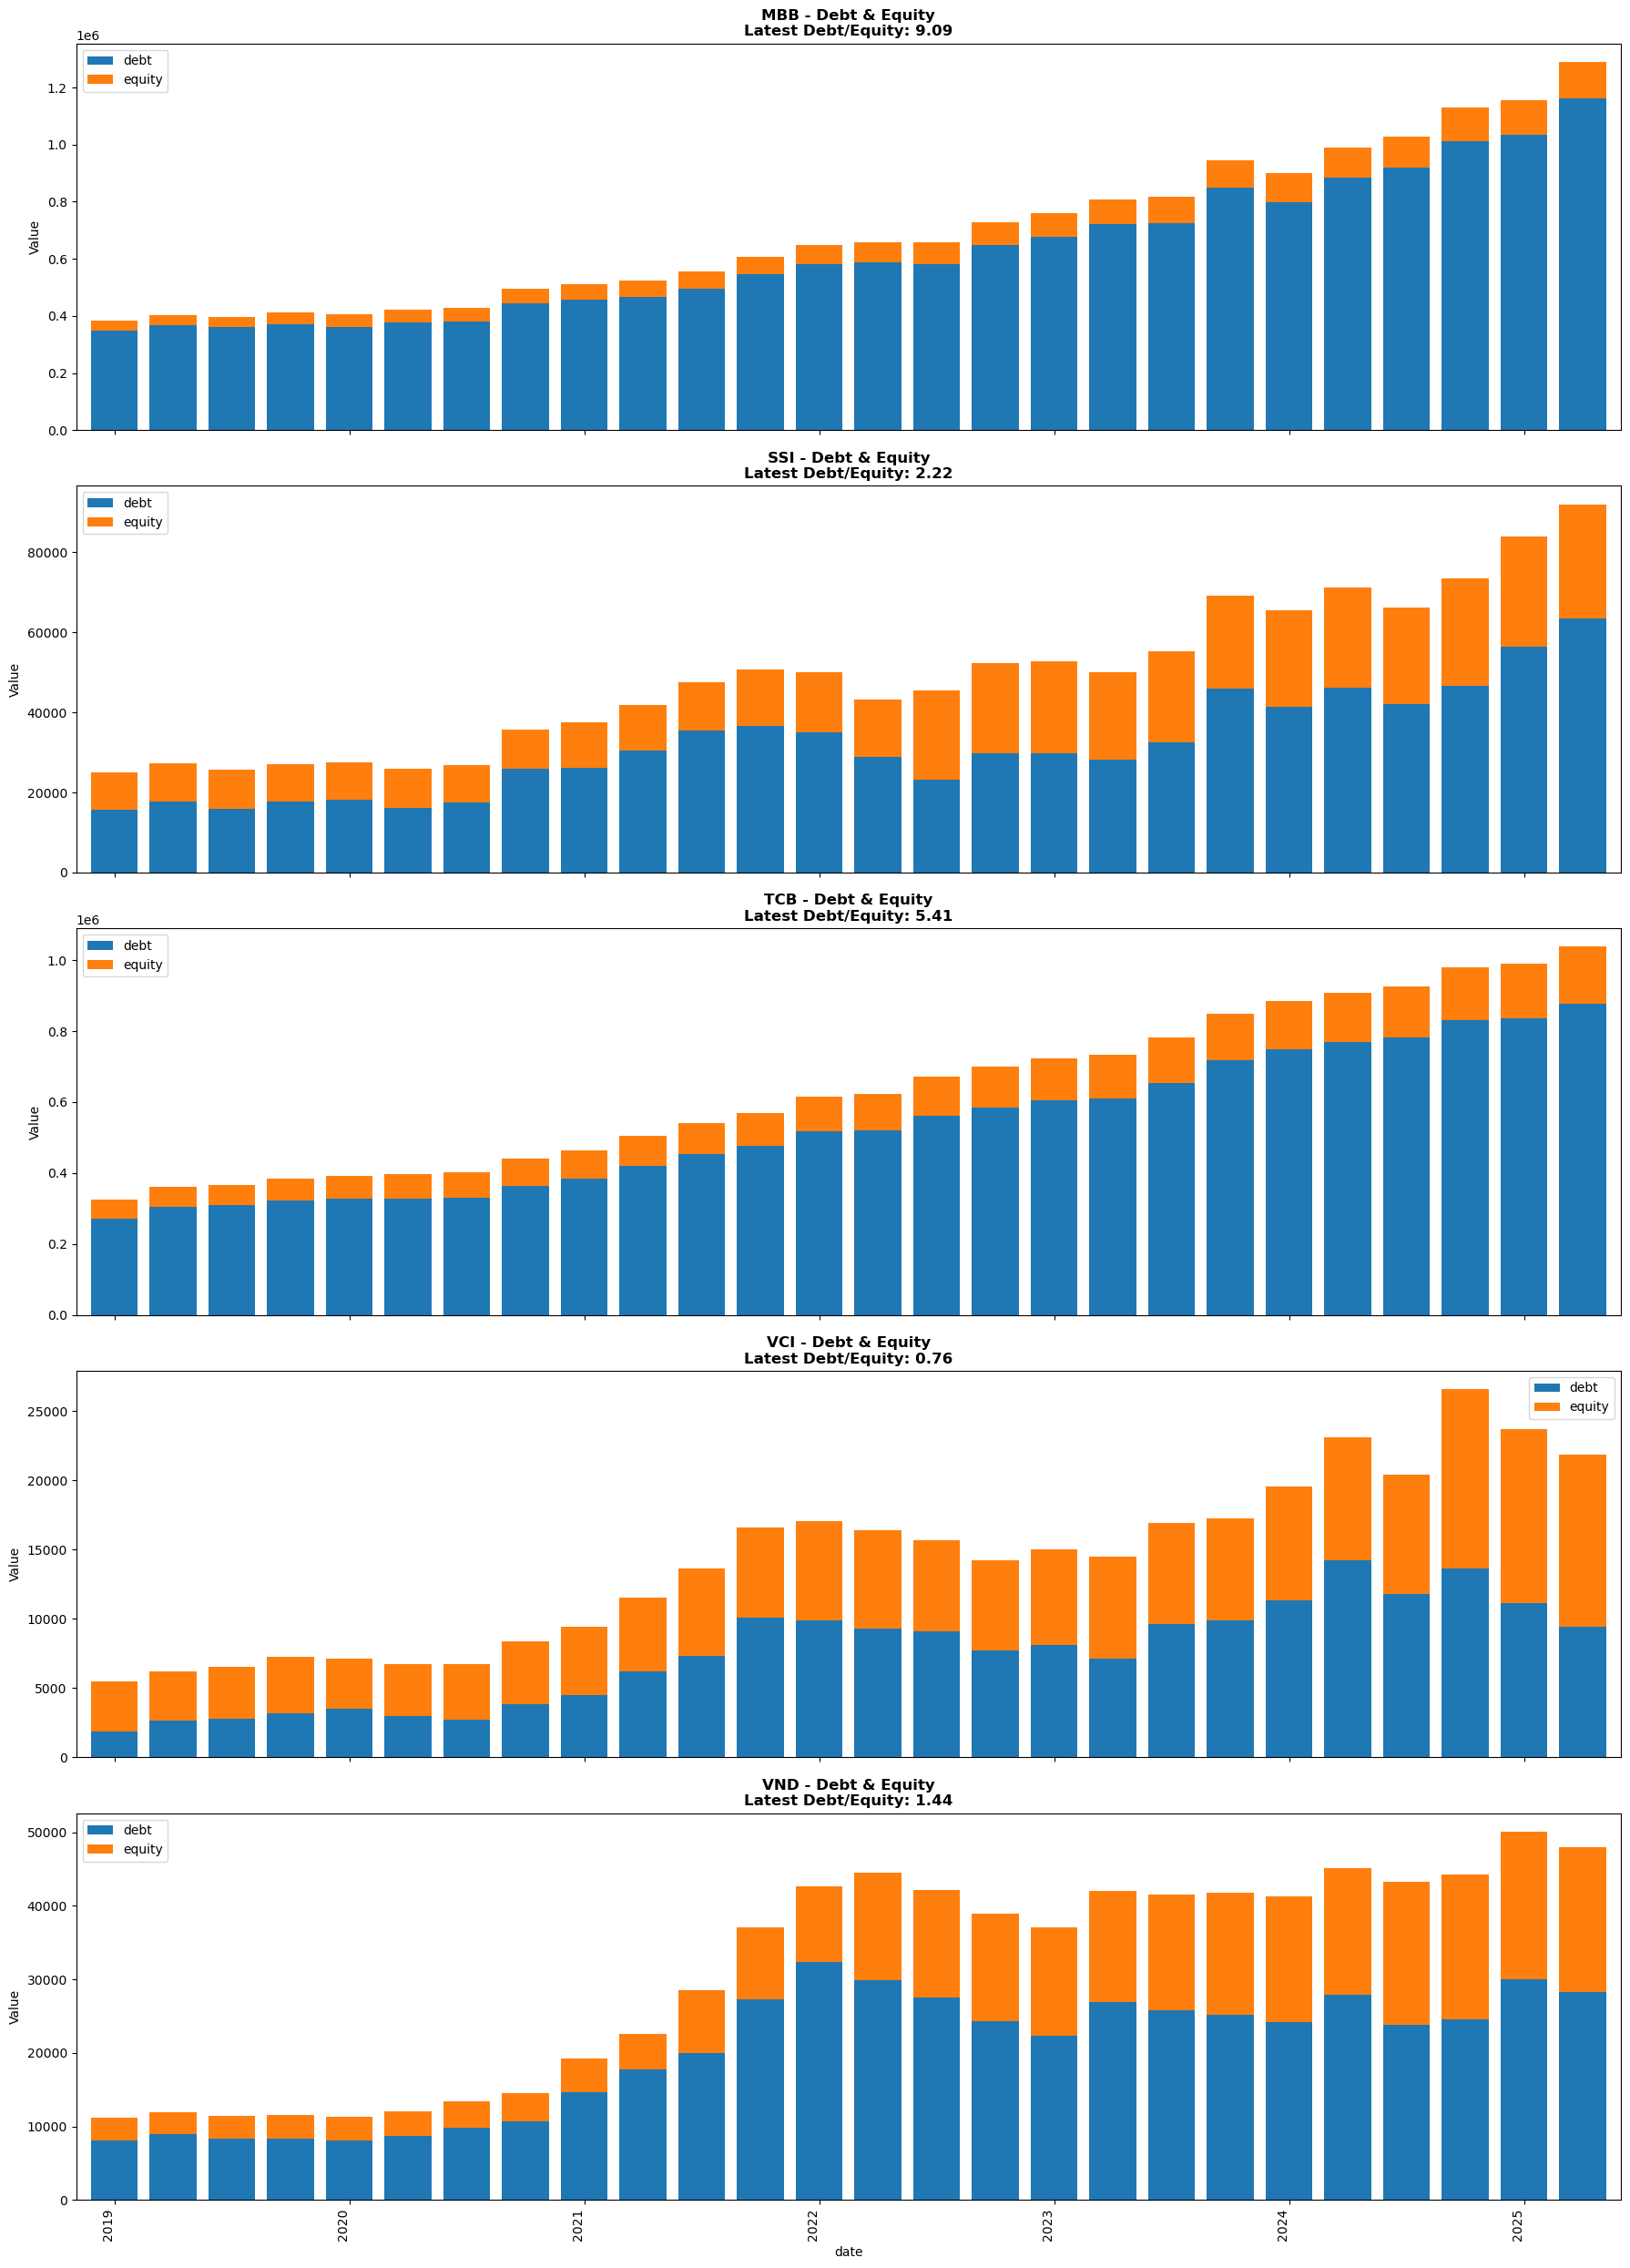

In [15]:
from matplotlib.ticker import MaxNLocator

unique_tickers = combined_bs.index.get_level_values('ticker').unique().sort_values()
num_tickers = len(unique_tickers)

fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(18, 5 * num_tickers),
                         squeeze=False) # squeeze=False keeps axes as a 2D array

for i, ticker in enumerate(unique_tickers):
    ticker_bs_data = combined_bs.loc[ticker].sort_index()

    # --- Chart 1: Debt and Equity (Bar Chart) ---
    ax1 = axes[i, 0]
    ticker_bs_data[['debt', 'equity']].plot(kind='bar', stacked=True, ax=ax1, width=0.8)

    # Calculate and display the latest Debt-to-Equity ratio
    latest_equity = ticker_bs_data['equity'].iloc[-1]
    latest_debt = ticker_bs_data['debt'].iloc[-1]
    # Avoid division by zero if equity is 0 or NaN
    if latest_equity and not pd.isna(latest_equity) and latest_equity != 0:
        d_e_ratio = latest_debt / latest_equity
        title_text = f'{ticker} - Debt & Equity\nLatest Debt/Equity: {d_e_ratio:.2f}'
    else:
        title_text = f'{ticker} - Debt & Equity\n(Equity is zero)'

    ax1.set_title(title_text, fontsize=12, weight='bold')
    ax1.set_ylabel('Value')

    x_labels = ticker_bs_data.index.strftime('%Y')
    ax1.set_xticklabels(x_labels, rotation=45, ha='right')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=8)) # Show at most 8 date labels
    ax1.figure.autofmt_xdate(rotation=90, ha='right') # Auto-format dates nicely


    # # --- Chart 2: Short-Term and Long-Term Debt (Line Chart) ---
    # ax2 = axes[i, 1]

    # # REASON FOR CHANGE: Handle cases where debt data is missing or zero to avoid empty plots.
    # if ticker_bs_data[['short_debt', 'long_debt']].sum().sum() > 0:
    #     ticker_bs_data[['short_debt', 'long_debt']].plot(kind='line', marker='o', ax=ax2, style='-o')
    #     ax2.set_title(f'{ticker} - Debt Components', fontsize=12)
    #     ax2.grid(True, linestyle='--', alpha=0.6)
    # else:
    #     # Display a message if there's no data to plot
    #     ax2.text(0.5, 0.5, 'No Short/Long Debt Data',
    #              horizontalalignment='center',
    #              verticalalignment='center',
    #              transform=ax2.transAxes,
    #              fontsize=12, color='gray')
    #     ax2.set_title(f'{ticker} - Debt Components', fontsize=12)

    # ax2.set_ylabel('Value')
    # ax2.set_xlabel('') # Remove x-label

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.show()


**Overview Finding:** The banks operate with high but stable leverage, which is normal for the sector and supported by a growing equity base. The securities firms, however, show a clear trend of **rapidly increasing debt** since 2020, indicating a strategic shift towards a more aggressive and riskier financial structure.


#### 3.3. Cash Generation Analysis



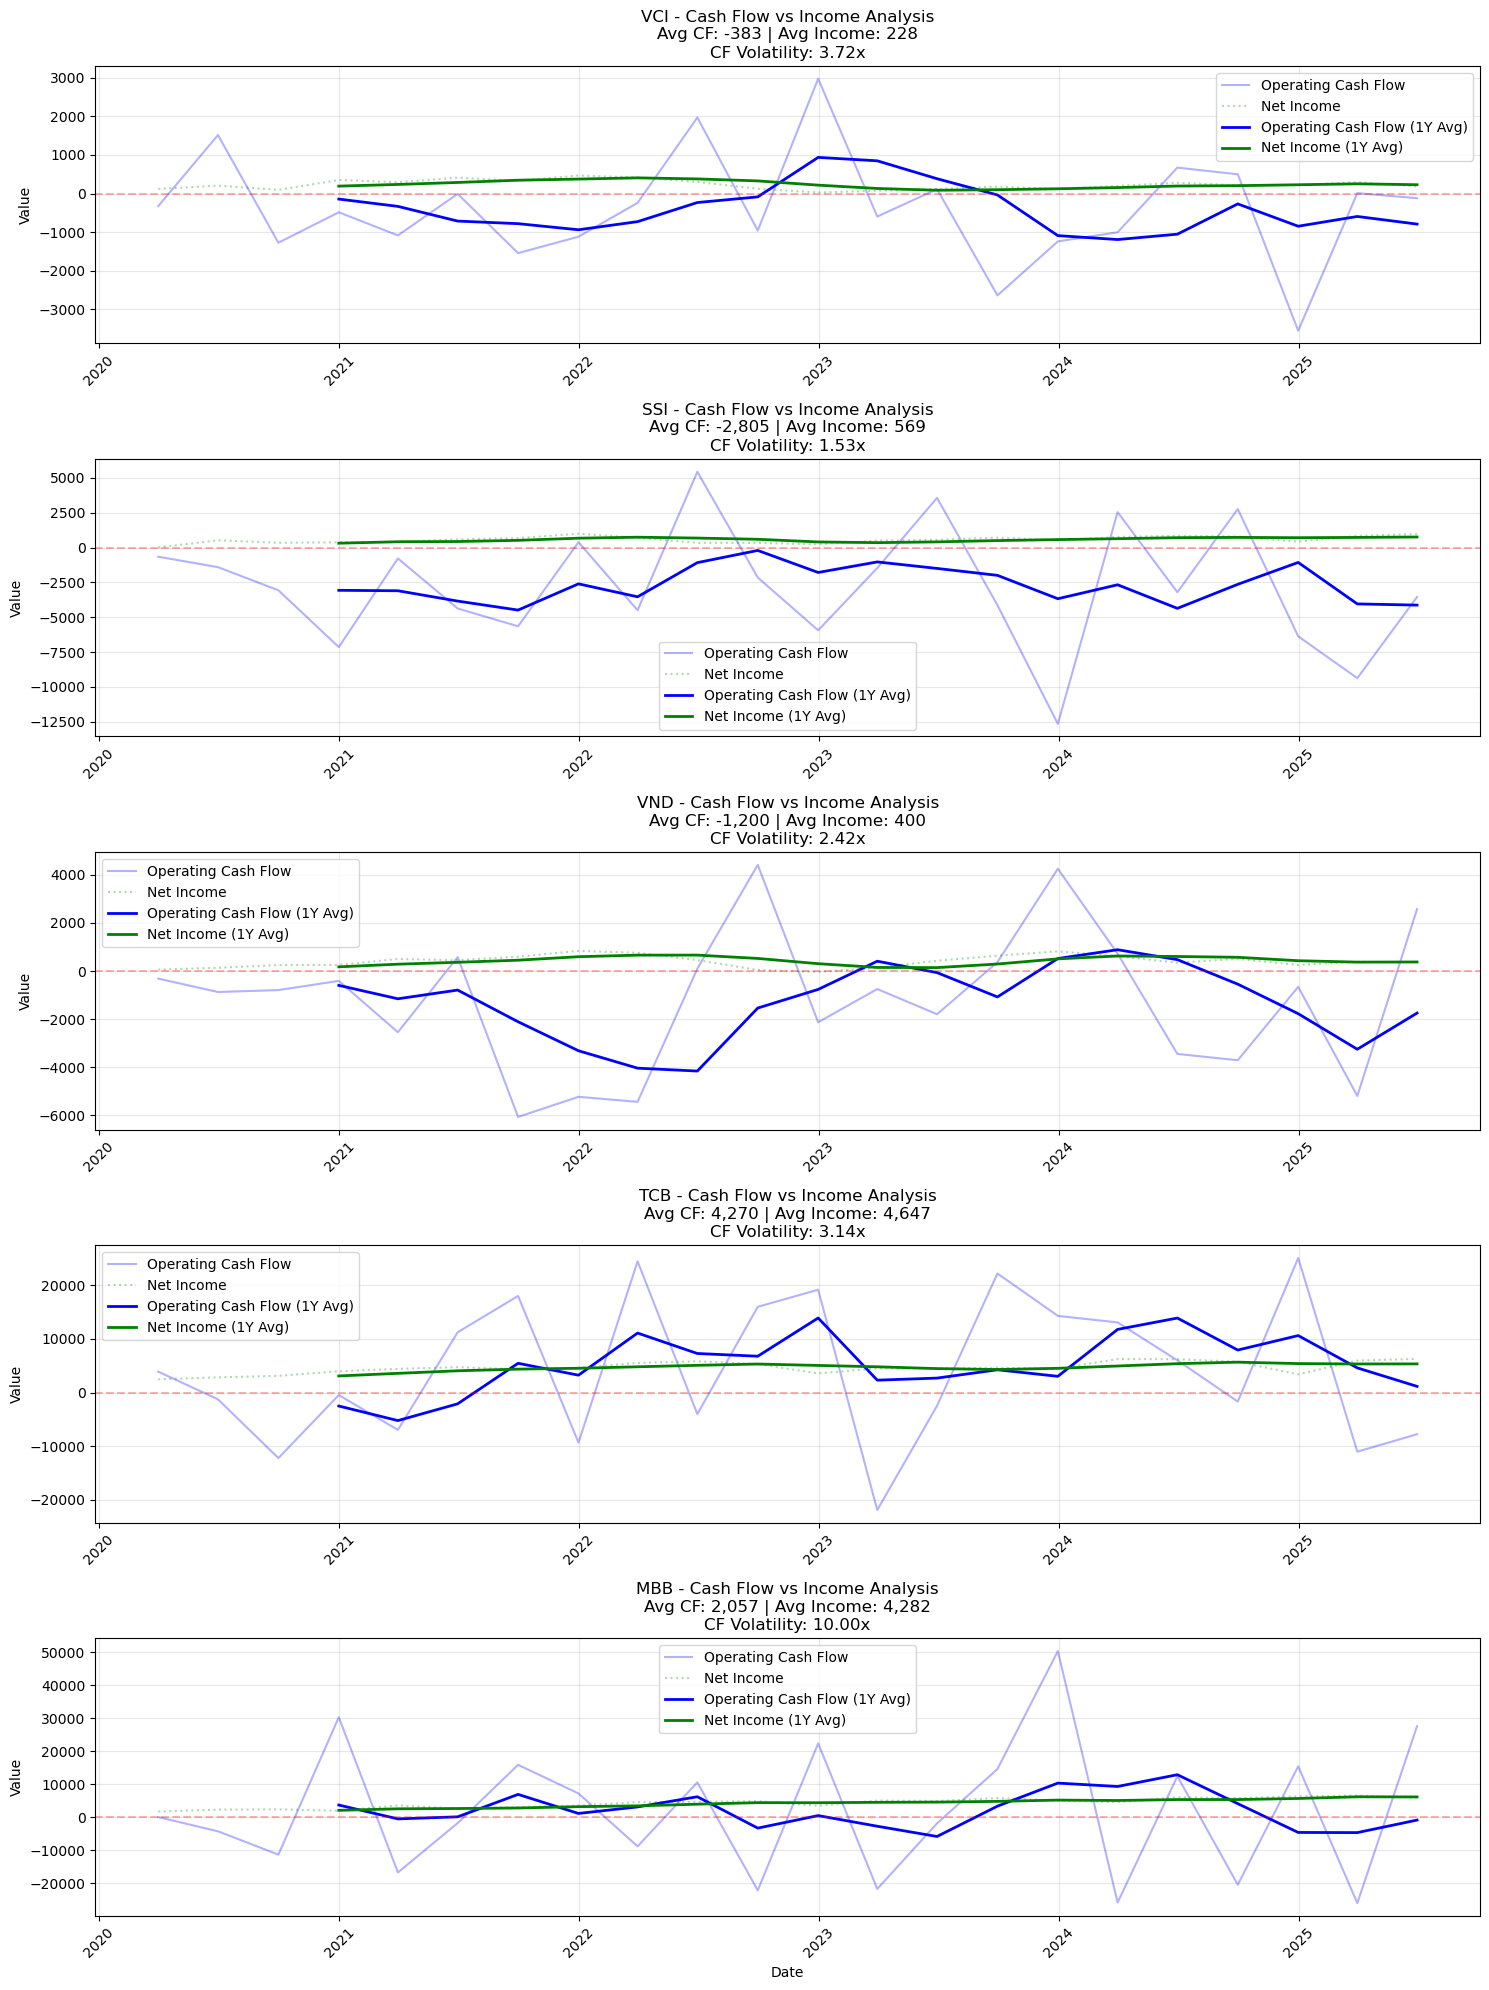

In [16]:
# Select relevant columns and calculate year-to-date totals
cf_subset = combined_cf[['from_sale', 'free_cash_flow']]
is_subset = combined_is[['share_holder_income']]

# Merge the data
merged_financial_data = cf_subset.merge(is_subset, left_index=True, right_index=True, how='inner')

# Get latest 5 years of data for better visibility
latest_year = merged_financial_data.index.get_level_values('date').max().year
start_date = pd.to_datetime(f'{latest_year - 5}-01-01')
recent_data = merged_financial_data[merged_financial_data.index.get_level_values('date') >= start_date]

# Create subplots for each ticker
unique_tickers = merged_financial_data.index.get_level_values('ticker').unique()
fig, axes = plt.subplots(nrows=len(unique_tickers), ncols=1, figsize=(15, 4*len(unique_tickers)))

if len(unique_tickers) == 1:
    axes = [axes]

for i, ticker in enumerate(unique_tickers):
    if ticker in recent_data.index.get_level_values('ticker').unique():
        ticker_data = recent_data.loc[ticker].sort_index()
        
        # Calculate moving averages for smoothing
        rolling_window = 4  # 4 quarters = 1 year
        cf_ma = ticker_data['from_sale'].rolling(window=rolling_window).mean()
        income_ma = ticker_data['share_holder_income'].rolling(window=rolling_window).mean()
        
        # Plot raw data with reduced opacity
        axes[i].plot(ticker_data.index, ticker_data['from_sale'], 
                    'b-', alpha=0.3, label='Operating Cash Flow')
        axes[i].plot(ticker_data.index, ticker_data['share_holder_income'], 
                    'g:', alpha=0.3, label='Net Income')
        
        # Plot moving averages with full opacity
        axes[i].plot(ticker_data.index, cf_ma, 
                    'b-', linewidth=2, label='Operating Cash Flow (1Y Avg)')
        axes[i].plot(ticker_data.index, income_ma, 
                    'g-', linewidth=2, label='Net Income (1Y Avg)')
        
        # Add horizontal line at y=0
        axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.3)
        
        # Calculate and display key metrics
        avg_cf = ticker_data['from_sale'].mean()
        avg_income = ticker_data['share_holder_income'].mean()
        cf_volatility = ticker_data['from_sale'].std() / abs(avg_cf) if avg_cf != 0 else float('inf')
        
        title = f"{ticker} - Cash Flow vs Income Analysis\n"
        title += f"Avg CF: {avg_cf:,.0f} | Avg Income: {avg_income:,.0f}\n"
        title += f"CF Volatility: {cf_volatility:.2f}x"
        
        axes[i].set_title(title)
        axes[i].set_ylabel('Value')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


**Overview Finding:** A critical weakness across all five companies is the highly volatile **Cash Flow from Operations**, which frequently disconnects from their much smoother reported **Shareholder Income**. This suggests that their accounting profits are not consistently being converted into real cash, posing a potential risk to the quality of their earnings.


#### 3.4. Key Ratio & Valuation Analysis



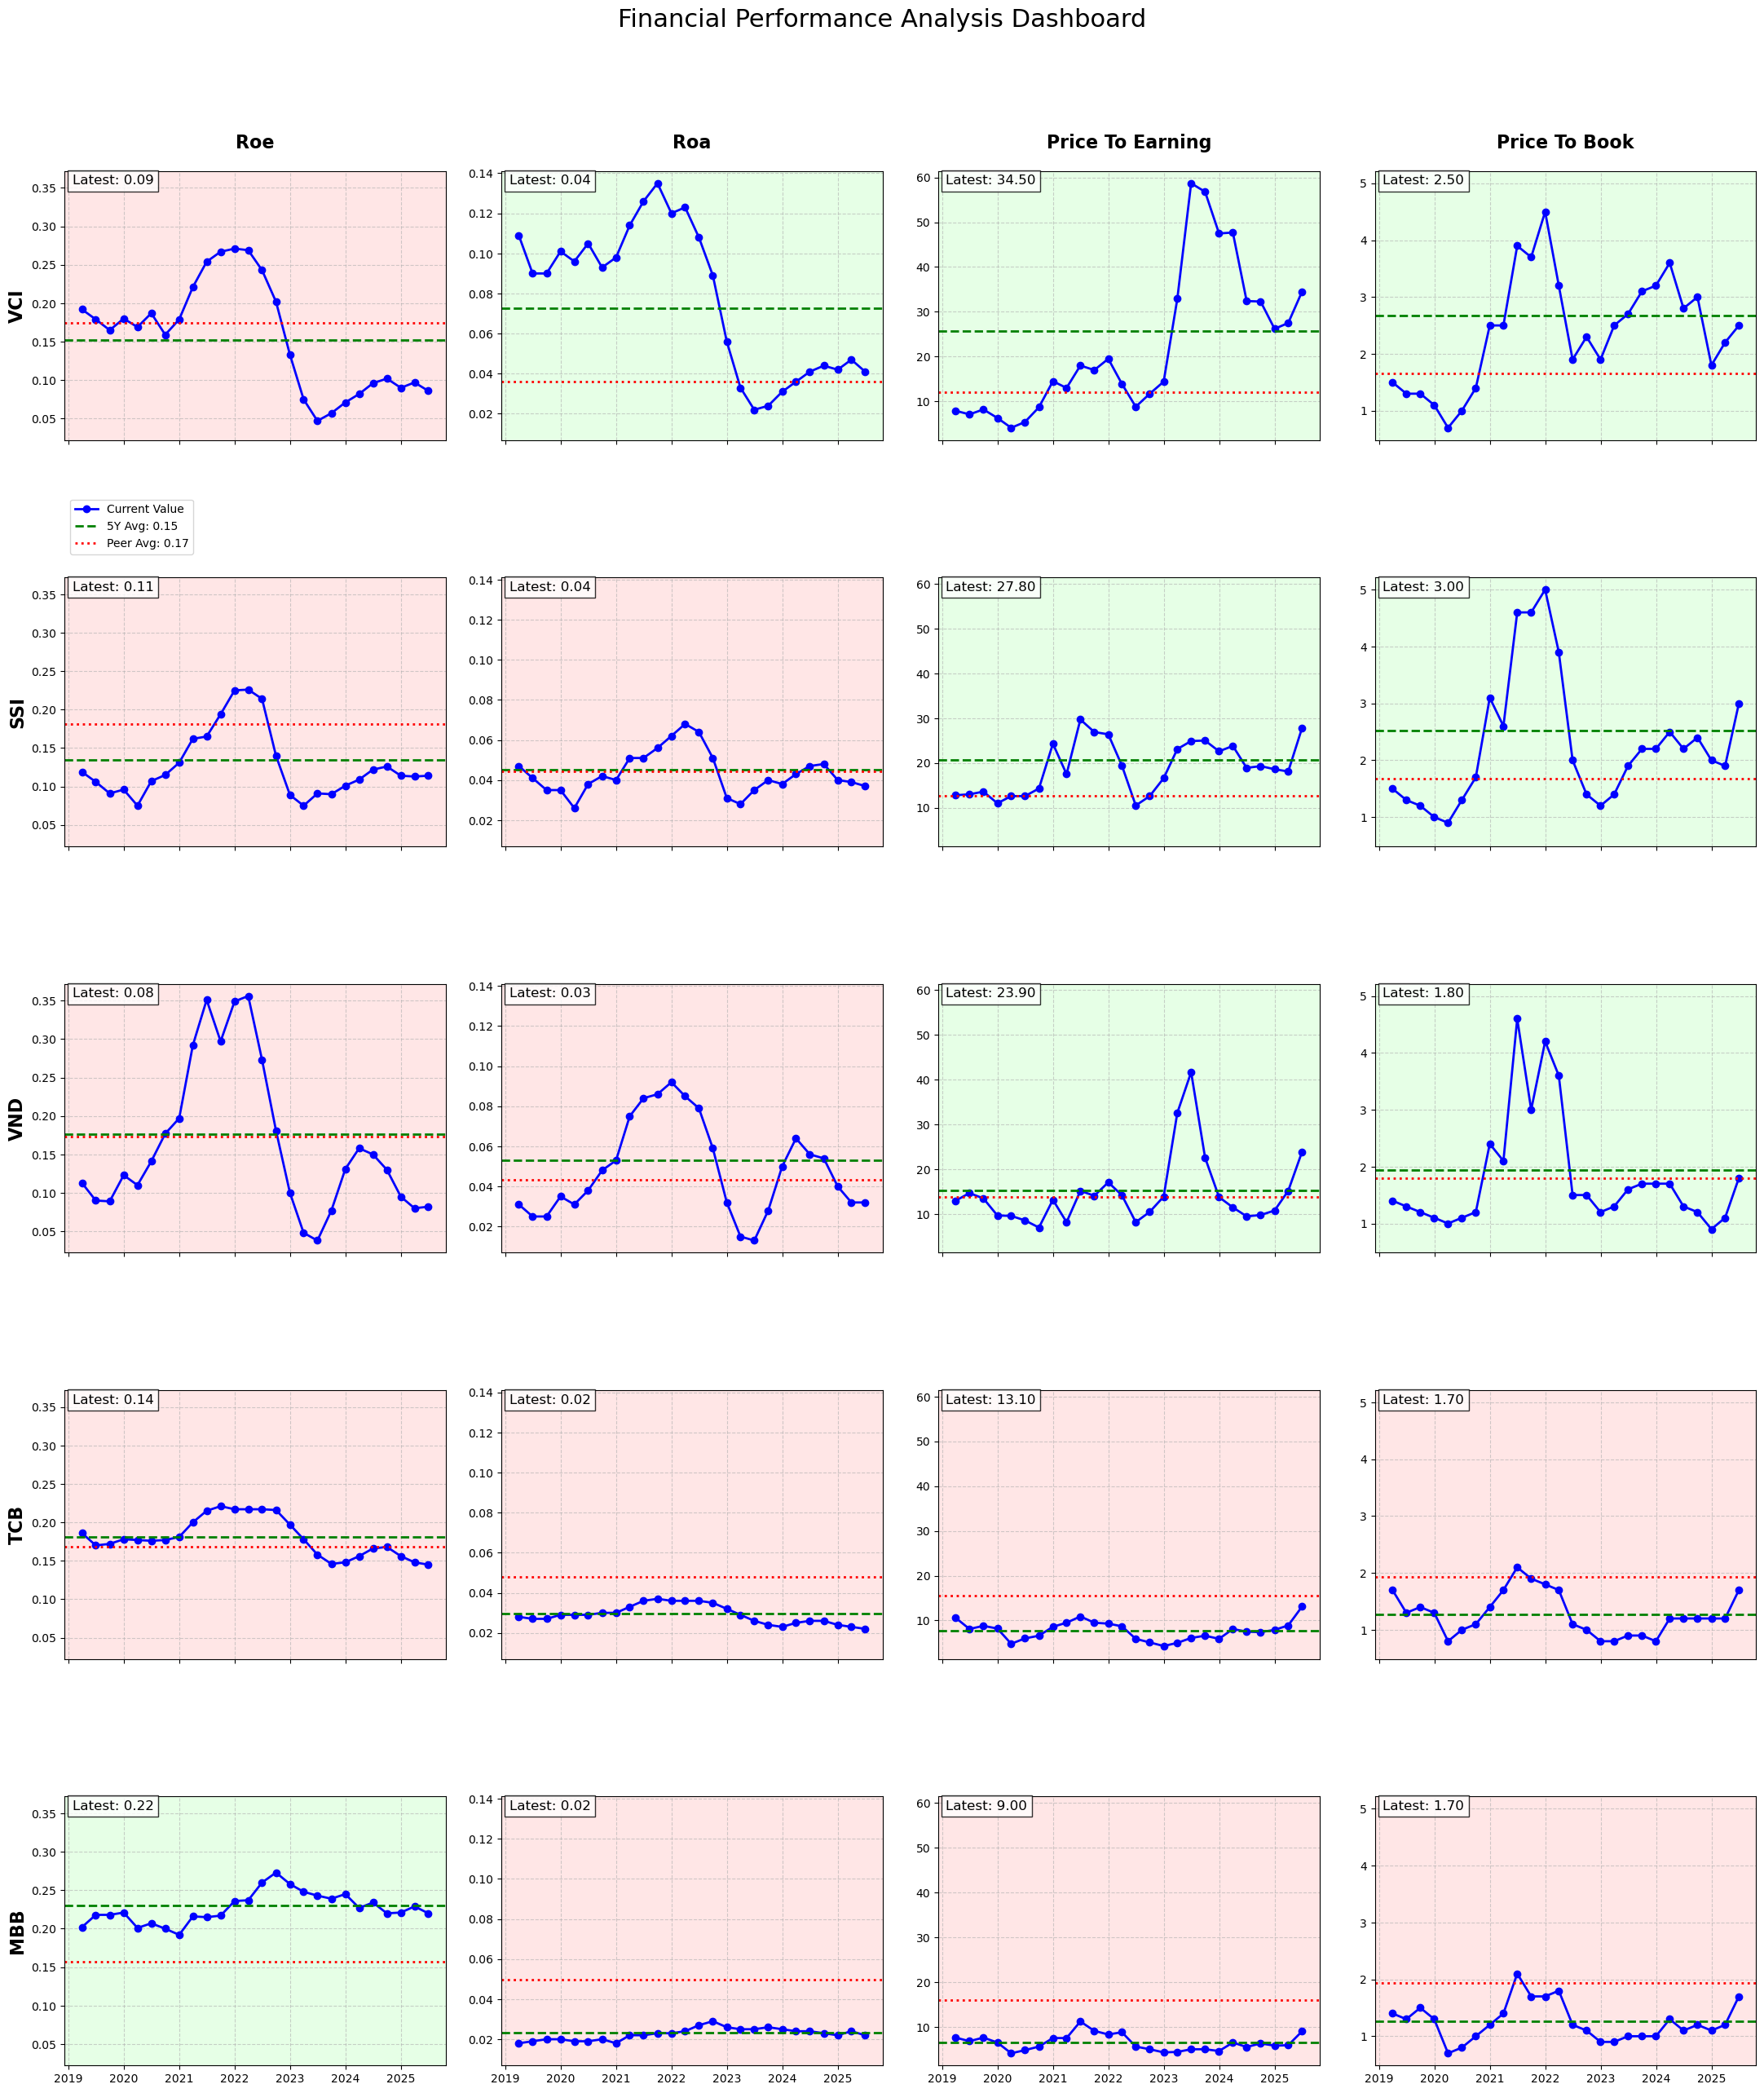

In [17]:
# Define the key ratios you want to analyze
key_ratios = ['roe', 'roa', 'price_to_earning', 'price_to_book']

# Create a figure with subplots arranged by ratios (columns) and companies (rows)
fig, axes = plt.subplots(
    nrows=len(unique_tickers),
    ncols=len(key_ratios),
    figsize=(22, 5 * len(unique_tickers)),
    sharex=True,
    sharey='col'  # Share y-axis within each ratio column for better comparison
)

# Add main title
fig.suptitle('Financial Performance Analysis Dashboard', fontsize=22, y=1.03)

# Loop through companies and ratios
for i, ticker in enumerate(unique_tickers):
    for j, ratio in enumerate(key_ratios):
        ax = axes[i, j]
        
        # Label companies on the left
        if j == 0:
            ax.set_ylabel(ticker, fontsize=16, weight='bold')
        
        # Label ratios on top
        if i == 0:
            ax.set_title(ratio.replace('_', ' ').title(), fontsize=16, weight='bold', pad=20)
        
        # Get data for current company and ratio
        ticker_ratio_data = combined_ratios.loc[ticker, ratio].dropna().sort_index()
        
        if not ticker_ratio_data.empty:
            # Plot company's ratio trend
            ax.plot(ticker_ratio_data.index, ticker_ratio_data.values, 
                   color='blue', marker='o', linestyle='-', 
                   label=f'Current Value', linewidth=2)
            
            # Calculate and plot 5-year average
            recent_data = ticker_ratio_data[ticker_ratio_data.index >= ticker_ratio_data.index.max() - pd.DateOffset(years=5)]
            avg_value = recent_data.mean()
            ax.axhline(avg_value, color='green', linestyle='--', 
                      label=f'5Y Avg: {avg_value:.2f}', linewidth=2)
            
            # Calculate and plot peer average
            peer_data = combined_ratios.loc[(slice(None), ticker_ratio_data.index), ratio]
            peer_data = peer_data[peer_data.index.get_level_values('ticker') != ticker]
            peer_avg = peer_data.mean()
            ax.axhline(peer_avg, color='red', linestyle=':', 
                      label=f'Peer Avg: {peer_avg:.2f}', linewidth=2)
            
            # Add current value annotation
            current_value = ticker_ratio_data.iloc[-1]
            ax.text(0.02, 0.95, f'Latest: {current_value:.2f}', 
                   transform=ax.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))
            
            # Highlight if performance is above/below peer average
            if current_value > peer_avg:
                ax.set_facecolor('#e6ffe6')  # Light green
            elif current_value < peer_avg:
                ax.set_facecolor('#ffe6e6')  # Light red
                
        else:
            ax.text(0.5, 0.5, 'No Data Available', 
                   ha='center', va='center', 
                   transform=ax.transAxes, 
                   fontsize=12, color='gray')
            
        ax.grid(True, linestyle='--', alpha=0.6)
        if i == 0 and j == 0:  # Legend only on first plot
            ax.legend(loc='upper left', bbox_to_anchor=(0, -0.2))

plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.95)
plt.show()



**Overview Finding:** A clear valuation disconnect is evident. The banks (**MBB, TCB**) appear **undervalued**, trading at low P/E and P/B ratios that are below their historical averages. Conversely, the securities firms (**VCI, SSI, VND**) appear **overvalued**, with high valuation multiples that are above their historical norms, which seems unjustified given their current weak profitability.

### **4. Comparative Analysis**

The visual dashboards provide a clear comparative view:
- **Profitability (ROE):** **MBB** is the clear outperformer in terms of current, stable profitability. The securities firms are all underperforming their historical averages, indicating they are in a cyclical downturn.
- **Stability (Debt/Equity):** The banks' leverage is high but standard for the industry. The securities firms' leverage is a key differentiator; **VCI** is the most prudent, while **SSI** and **VND** have embraced higher risk.
- **Valuation (P/E Ratio):** There is a stark valuation disconnect. The banks (**MBB, TCB**) are fundamentally strong yet trade at a discount (P/E < 8). The securities firms (**VCI, SSI, VND**) are fundamentally weaker at present yet trade at a significant premium (P/E > 25).

| Ticker | Sector | Latest ROE | 5Y Avg ROE | Latest P/E | 5Y Avg P/E | Valuation Signal |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **MBB** | Bank | **0.22** | 0.19 | **6.64** | 6.84 | **Undervalued** |
| **TCB** | Bank | **0.14** | 0.18 | **7.66** | 7.86 | **Undervalued** |
| **VCI** | Securities | 0.09 | 0.17 | 34.50 | 25.69 | **Overvalued** |
| **SSI** | Securities | 0.11 | 0.13 | 27.60 | 20.61 | **Overvalued** |
| **VND** | Securities | 0.08 | 0.18 | 25.90 | 15.31 | **Overvalued** |



### **5. Portfolio Recommendation**

Based on the analysis, we recommend a defensive posture that favors value and stability over speculative growth.

- **BUY: MBB, TCB**
    - **Rationale:** Both banks represent high-quality institutions with a proven ability to generate stable profits. Their current undervaluation presents a compelling entry point with a favorable risk/reward profile. They are suitable for core long-term holdings.

- **HOLD/REDUCE: VCI, SSI, VND**
    - **Rationale:** The securities firms are unattractive at their current valuations. The combination of cyclical earnings, rising financial risk, and extended valuation multiples creates a significant risk of capital loss. We recommend reducing exposure or holding only minimal, speculative positions. If exposure to this sector is required, **VCI** is preferred due to its more conservative balance sheet.





### **6. Conclusion**

The Vietnamese financial markets currently offer a clear tale of two sectors. The **banks (MBB, TCB)** provide a defensive investment with strong fundamentals at a discounted price. The **securities firms (VCI, SSI, VND)** represent a high-risk, speculative play that is contingent on a strong bull market to justify their lofty valuations.

Investors should monitor macroeconomic factors, particularly the State Bank of Vietnam's interest rate policies and overall GDP growth, which will influence credit growth for banks. For securities firms, market trading volumes are the key metric to watch.



### **7. Limitations & Further Work**

- **Limitations:** This analysis is based on historical data and does not incorporate forward-looking macroeconomic modeling. It also excludes qualitative factors such as management strategy, corporate governance, and regulatory risks.
- **Further Work:** To enhance this analysis, we recommend:
    1.  Developing **Discounted Cash Flow (DCF)** models for a more rigorous intrinsic value assessment.
    2.  Conducting **stress tests** on the banks' loan portfolios under various economic scenarios.
    3.  Incorporating **macroeconomic overlays** to forecast sector-level performance.
    
